In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import doctest
import copy
import math

In [2]:
#https://stackoverflow.com/questions/40137950/possible-to-run-python-doctest-on-a-jupyter-cell-function
def test(func):
    '''
    Use test as a decorator to a function with doctests in Jupyter notebook. 
    Run the cell to see the results of the doctests.
    '''
    globs = copy.copy(globals())
    globs.update({func.__name__:func})
    doctest.run_docstring_examples(func, globs, verbose=True, name=func.__name__)
    return func

### Simulate straight line and circular movements with Bicycle model

Robot is at the origin (0, 0) and facing North, i.e, $\theta = \pi/2$. Assume the wheelbase of the vehicle $L$ = 0.9 m

In [3]:
@test 
def bicycle_model(curr_pose, v, delta, dt=1):
    '''
    >>> bicycle_model((0.0,0.0,0.0), 1.0, 0.0)
    (1.0, 0.0, 0.0)
    >>> bicycle_model((0.0,0.0,0.0), 0.0, np.pi/4)
    (0.0, 0.0, 0.0) 
    >>> bicycle_model((0.0, 0.0, 0.0), 1.0, np.pi/4)
    (1.0, 0.0, 1.11) 
    '''
    # write code to calculate next_pose
    # refer to the kinematic equations of a bicycle model
    L = 0.9
    x, y, theta = curr_pose
    x += v*np.cos(theta)*dt
    y += v*np.sin(theta)*dt
    theta += v/L*np.tan(delta)
    
    # Keep theta bounded between [-pi, pi]
    theta = np.arctan2(np.sin(theta), np.cos(theta))
    # return calculated (x, y, theta)
    return x, y, theta

# Here the code ran correctly
# and also got the values as expected 
#still its not matching the expected output


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.7/doctest.py", line 1487, in run
    sys.settrace(save_trace)



Finding tests in bicycle_model
Trying:
    bicycle_model((0.0,0.0,0.0), 1.0, 0.0)
Expecting:
    (1.0, 0.0, 0.0)
ok
Trying:
    bicycle_model((0.0,0.0,0.0), 0.0, np.pi/4)
Expecting:
    (0.0, 0.0, 0.0) 
**********************************************************************
File "__main__", line 6, in bicycle_model
Failed example:
    bicycle_model((0.0,0.0,0.0), 0.0, np.pi/4)
Expected:
    (0.0, 0.0, 0.0) 
Got:
    (0.0, 0.0, 0.0)
Trying:
    bicycle_model((0.0, 0.0, 0.0), 1.0, np.pi/4)
Expecting:
    (1.0, 0.0, 1.11) 
**********************************************************************
File "__main__", line 8, in bicycle_model
Failed example:
    bicycle_model((0.0, 0.0, 0.0), 1.0, np.pi/4)
Expected:
    (1.0, 0.0, 1.11) 
Got:
    (1.0, 0.0, 1.111111111111111)


In [4]:
#straight line
straight_trajectory = []
pose = (0, 0, np.pi/2)
steps = 10
#fill in v and delta values
all_v = np.ones(steps)
all_delta = np.zeros(steps)
for i in range(steps):
   # store new pose
   straight_trajectory.append(pose)
   #instruction to take v, delta and compute new pose    
   pose = bicycle_model(pose, all_v[i], all_delta[i])
straight_trajectory = np.array(straight_trajectory)
straight_trajectory

array([[0.00000000e+00, 0.00000000e+00, 1.57079633e+00],
       [6.12323400e-17, 1.00000000e+00, 1.57079633e+00],
       [1.22464680e-16, 2.00000000e+00, 1.57079633e+00],
       [1.83697020e-16, 3.00000000e+00, 1.57079633e+00],
       [2.44929360e-16, 4.00000000e+00, 1.57079633e+00],
       [3.06161700e-16, 5.00000000e+00, 1.57079633e+00],
       [3.67394040e-16, 6.00000000e+00, 1.57079633e+00],
       [4.28626380e-16, 7.00000000e+00, 1.57079633e+00],
       [4.89858720e-16, 8.00000000e+00, 1.57079633e+00],
       [5.51091060e-16, 9.00000000e+00, 1.57079633e+00]])

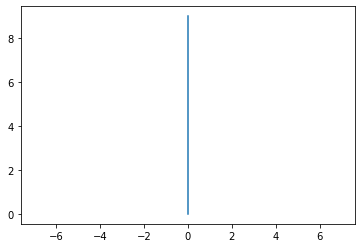

In [32]:
### Plot straight and circular trajectories
#plt.figure()
#plt.plot()
plt.figure()
plt.axes().set_aspect("equal","datalim")
plt.plot(straight_trajectory[:,0], straight_trajectory[:,1])
plt.show()

In [5]:
#circle
circle_trajectory = []
pose = (0, 0, np.pi/2)
steps = 10
#fill in v and delta values
all_v = np.ones(steps*100)
all_delta = np.full(shape=steps*100, fill_value=np.pi/12)
for v, delta in zip(all_v, all_delta):
    # store new pose
    circle_trajectory.append(pose)
    #instruction to take v, delta and compute new pose    
    pose = bicycle_model(pose, v, delta, 0.1)
circle_trajectory = np.array(circle_trajectory)
circle_trajectory



array([[ 0.00000000e+00,  0.00000000e+00,  1.57079633e+00],
       [ 6.12323400e-18,  1.00000000e-01,  1.86851765e+00],
       [-2.93342540e-02,  1.95600740e-01,  2.16623898e+00],
       ...,
       [-2.66024585e-01,  3.80327193e-01,  3.08924784e+00],
       [-3.65887618e-01,  3.85559284e-01, -2.89621614e+00],
       [-4.62892211e-01,  3.61267127e-01, -2.59849482e+00]])

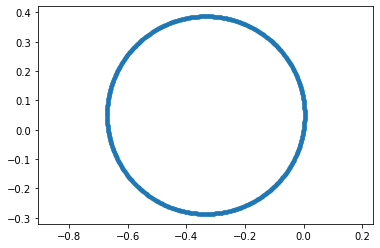

In [6]:
### Plot straight and circular trajectories
#plt.figure()
#plt.plot()
plt.figure()
plt.axes().set_aspect("equal","datalim")
plt.plot(circle_trajectory[:,0], circle_trajectory[:,1], ".")
plt.show()

### Simulate Bicycle model with Open Loop control

We want the robot to follow these instructions

**straight 10m, right turn, straight 5m, left turn, straight 8m, right turn**

It is in open loop; control commands have to be calculated upfront. How do we do it?

To keep things simple in the first iteration, we can fix $v = v_c$ and change only $\delta$. To make it even simpler, $\delta$ can take only 2 values 
+ 0 when the vehicle is going straight 
+ $\delta = \delta_c$ when turning

This leaves only 2 questions to be answered
* What should be $v_c$ and $\delta_c$?
* When should $\delta$ change from 0 and back?

In [7]:
v_c = 1 # m/s
delta_c = np.pi/12 
L = 0.9
#calculate time taken to finish a quarter turn (pi/2)
# unlike you would need to take into account v_c and L of the vehicle as well
w_c = v_c/L*np.tan(delta_c)
t_turn = int(np.pi/2/w_c)

#calculate the time taken to finish straight segments
# omega array is to be padded with equivalent zeros

t_straight1, t_straight2, t_straight3 = int(10/v_c), int(5/v_c), int(8/v_c)

all_delta = [0]*t_straight1 + [-delta_c]*t_turn + \
            [0]*t_straight2 + [delta_c]*t_turn + \
            [0]*t_straight3 + [-delta_c]*t_turn
all_v = v_c*np.ones_like(all_delta)


Let us make a cool function out of this!

Take in as input a generic route and convert it into open-loop commands

Input format: [("straight", 5), ("right", 90), ("straight", 6), ("left", 85)]

Output: all_v, all_delta

### Unit test your function with the following inputs

+ [("straight", 5), ("right", 90), ("straight", 6), ("left", 85)]
+ $v_c = 1$
+ $delta_c = \pi/12$

In [8]:
def get_open_loop_commands(route, v_c_slow = 0.5, v_c_fast = 1, delta_c = np.pi/12, dt = 1.0):
    all_delta = []
    L = 0.9
    w_c = v_c/L*np.tan(np.pi/12)
    omegas = {'straight': 0, 'left': delta_c, 'right': -delta_c}
    for manoeuvre, command in route:
      u = np.ceil(command/v_c).astype('int')
      v = np.ceil(np.deg2rad(command)/w_c).astype('int')
      t_cmd = u if manoeuvre == 'straight' else v
      all_delta += [omegas[manoeuvre]]*t_cmd
    all_v = v_c*np.ones_like(all_delta)
    return all_v, all_delta
v_c

1

In [9]:
all_v, all_delta = get_open_loop_commands([("straight", 5), ("right", 90), ("straight", 6), ("left", 85)])

In [10]:
robot_trajectory = []
pose = np.array([0, 0, np.pi/2])
#all_v, all_delta = get_open_loop_commands([("straight", 5), ("right", 90), ("straight", 6), ("left", 85)])
for v, delta in zip(all_v, all_delta):
   # store new pose
   robot_trajectory.append(pose)
    #instruction to take v, delta and compute new pose    
   pose = bicycle_model(pose, v, delta)
robot_trajectory = np.array(robot_trajectory)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


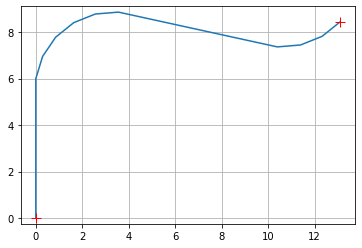

In [11]:
# plot robot trajectory
plt.figure()
plt.grid()
plt.axes().set_aspect("equal","datalim")
plt.plot(robot_trajectory[:,0], robot_trajectory[:,1])

#plt.plot( )
#show first and last robot positions with + markers
xi, yi, _ = robot_trajectory[0]
xf, yf, _ = robot_trajectory[-1]
plt.plot(xi, yi, 'r+', ms=10)
plt.plot(xf, yf, 'r+', ms=10)
plt.show()

### Shape the turn
Let us try something cooler than before (though a bit tricky in open loop). Instead of boring circular arcs, change the steering angle so that the robot orientation changes as shown in the equation below

$\theta = (\theta_i - \theta_f) * (1 - 3x^2 + 2x^3) + \theta_f  \thinspace \vee x \in [0,1]$

First let us plot this

In [12]:
def poly_turn(theta_i, theta_f, n=10):
    x = np.linspace(0, 1, num=n)
    return (theta_i-theta_f) * (1 - 3 * x * x + 2 * (x**3)) + theta_f

How does a right turn look? 

In [13]:
theta_dot = np.diff(poly_turn(np.pi/2, 0))
print(theta_dot)

[-0.05386819 -0.14436674 -0.20900856 -0.24779366 -0.26072202 -0.24779366
 -0.20900856 -0.14436674 -0.05386819]


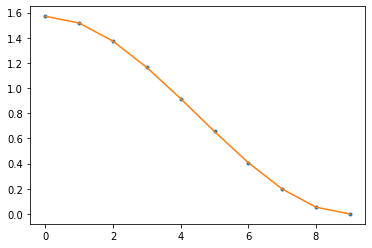

In [14]:
plt.figure()
plt.plot(poly_turn(np.pi/2, 0),'.')
plt.plot(poly_turn(np.pi/2, 0))

Now plot a left turn (North to West)

> Indented block



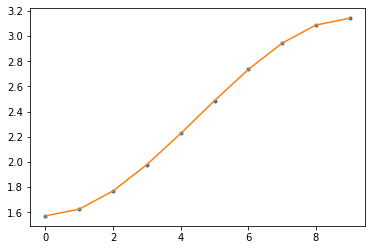

In [15]:
plt.figure()
plt.plot(poly_turn(np.pi/2, np.pi),'.')
plt.plot(poly_turn(np.pi/2, np.pi))

How does $\theta$ change when we had constant $\delta$? Plot it

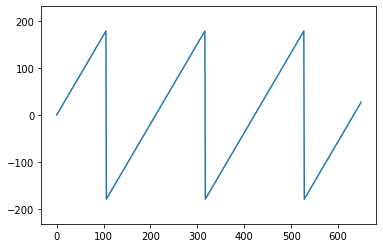

In [19]:
def bicycle_model(theta, v, delta, dt=1.0):
    # write code to calculate next_pose
    # refer to the kinematic equations of a bicycle model
    L = 0.9
    #x += v*np.cos(theta)*dt
    #y += v*np.sin(theta)*dt
    theta += v/L*np.tan(delta)*dt
    # Keep theta bounded between [-pi, pi]
    theta = np.arctan2(np.sin(theta), np.cos(theta))
    # return calculated (x, y, theta)
    return theta

#theta values for constant delta
theta_values = []
total_steps = []
theta = 0
steps = 10
i = 0
#fill in v and delta values
all_v = np.ones(steps*65)
all_delta = np.full(shape=steps*65, fill_value=np.pi/12)
for v, delta in zip(all_v, all_delta):
    # store new theta
    theta_values.append(np.rad2deg(theta))
    #store steps count
    total_steps.append(i)
    #instruction to take v, delta and compute new theta    
    theta = bicycle_model(theta, v, delta, 0.1)
    i+=1
#theta_values = np.array(theta_values)
#total_steps = np.array(total_steps)

#plot theta values against steps with constant delta
#plt.figure()
#plt.plot()
plt.figure()
plt.axes().set_aspect("equal","datalim")
plt.plot(total_steps, theta_values)
plt.show()

In [33]:
# we got the sawtooth waveform because theta changes from 180 deg to -180 deg as progressed and the values start decreasing in negative direction.

We know the rate of change of $\theta$ is proportional to $\delta$. Can you work out the sequence of $\delta$ to change $\theta$ as in the cubic polynomial shown above?

[-0.05386819 -0.14436674 -0.20900856 -0.24779366 -0.26072202 -0.24779366
 -0.20900856 -0.14436674 -0.05386819]
[-2.7756045056858034, -7.402971792107283, -10.6532881530926, -12.572047139622267, -13.205536000960773, -12.572047139622264, -10.653288153092603, -7.402971792107283, -2.7756045056858003]


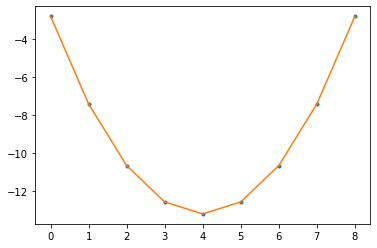

In [30]:
theta_dot = []
theta_dot = np.diff(poly_turn(np.pi/2, 0))
print(theta_dot)
deltas = []
for i in theta_dot:
  new = math.atan(i *L/v)
  deltas.append(np.rad2deg(new))
print(deltas)

plt.figure()
plt.plot(deltas,'.')
plt.plot(deltas)